# Student Details
> Name: Brent Moran <br>
> Course: CS 5402 <br>
> Assignment: Programming Assignment 4 <br>
> Date: 2021-7-20 <br>

## Concept Description:
> We have been given data and need to create a model given ceratain factors to determine if someone has chronic heart disease. 


## Description of data
> Data was given to us. We have 3814 rows of data. <br>
>The client has provided anonymized patient data that contains:Age (Age)<br>
>Count of Cigarettes Per Day (cigPerDay)<br>
>Total Cholesterol (totChol)<br>
>Systolic Blood Pressure (sysBP)<br>
>Diastolic Blood Pressure (diaBP)<br>
>Body Mass Index BMI<br>
>Heart Rate (heartRate)<br>
>Blood Glucose level (glucose)<br>
>The client has classified each patient as either havingCHD (CHD = 1) or does not have CHD(CHD = 0).

In [33]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn


# Data import and display

In [49]:
df = pd.read_csv("heart-disease-data.csv")
df

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,CHD
0,39,0,195,106.0,70.0,26.97,80,77,0
1,46,0,250,121.0,81.0,28.73,95,76,0
2,48,20,245,127.5,80.0,25.34,75,70,0
3,61,30,225,150.0,95.0,28.58,65,103,1
4,46,23,285,130.0,84.0,23.10,85,85,0
...,...,...,...,...,...,...,...,...,...
3809,68,0,176,168.0,97.0,23.14,60,79,1
3810,50,1,313,179.0,92.0,25.97,66,86,1
3811,51,43,207,126.5,80.0,19.71,65,68,0
3812,48,20,248,131.0,72.0,22.00,84,86,0


# Data exploration
> Checking for missing values and displaying their rows

In [35]:
df.isnull().sum()
null_data = df[df.isnull().any(axis=1)]
mylist = null_data.index.values.tolist()
null_data

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,CHD
91,40,0,205,100.0,60.0,NaN,60,72,1
1048,64,3,221,148.0,85.0,NaN,90,80,1
1446,40,0,164,135.0,75.0,NaN,75,85,0
1456,40,20,266,101.0,73.0,NaN,70,64,0
1474,70,0,107,143.0,93.0,NaN,68,62,1
1783,63,20,213,163.0,94.0,NaN,76,69,1
1844,35,0,274,104.0,61.0,NaN,60,68,0
1861,58,1,244,160.5,98.0,NaN,86,69,0
1881,65,0,240,235.0,100.0,NaN,68,297,1
1955,53,0,240,109.0,79.0,NaN,92,80,1


## Scatter plots to show the data

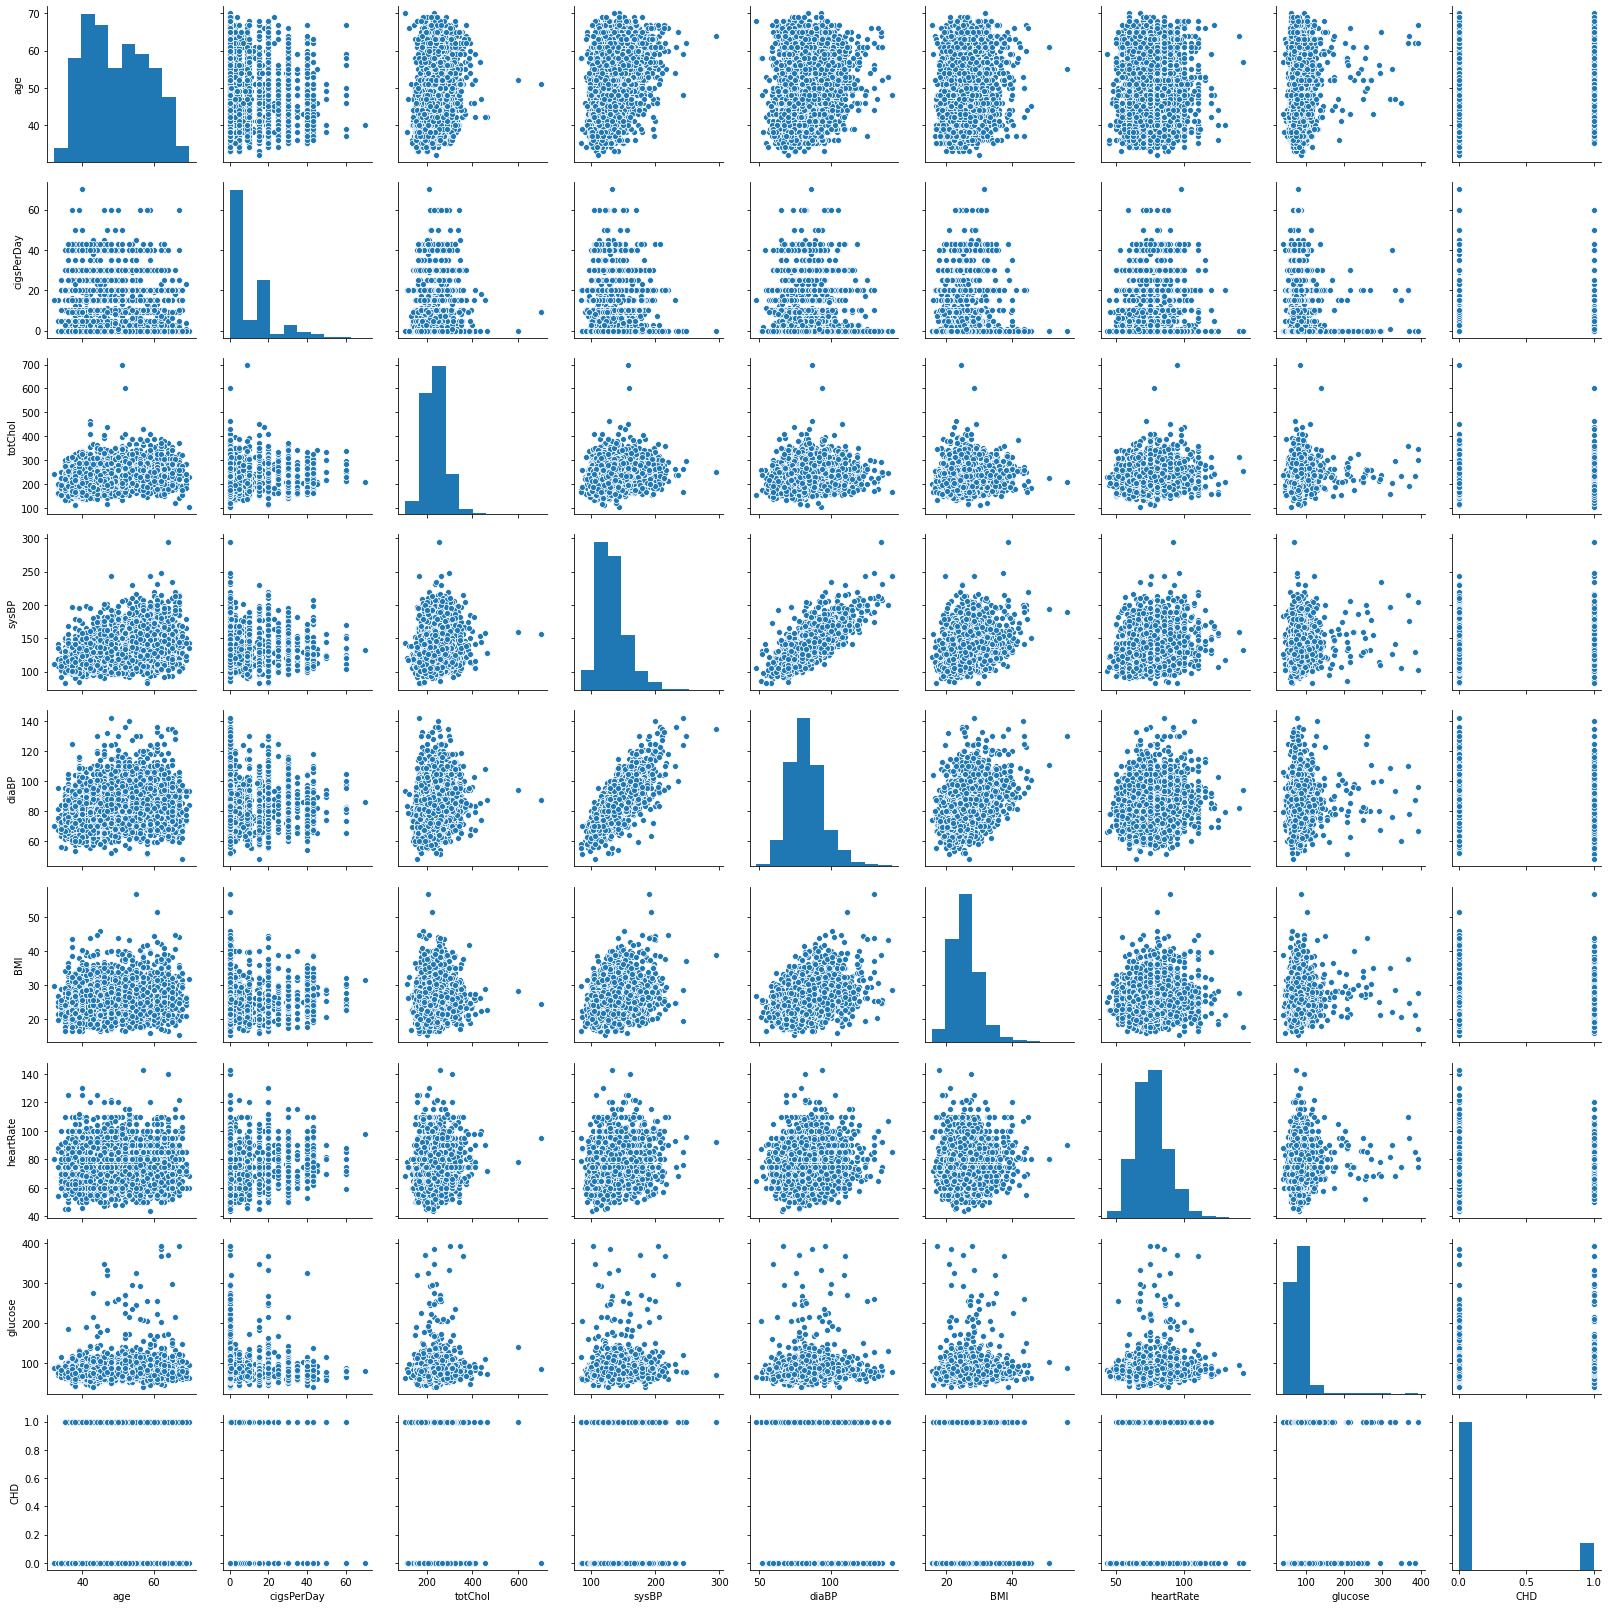

In [36]:
seaborn.pairplot(df)

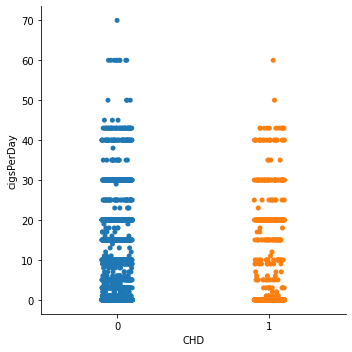

In [64]:
data = df[["cigsPerDay", "CHD"]]
seaborn.catplot(x="CHD", y="cigsPerDay", data = data)

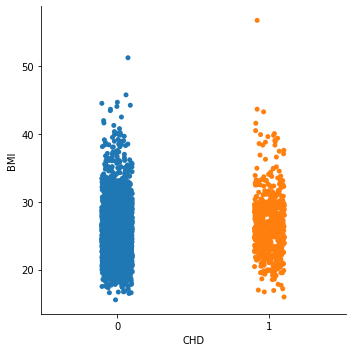

In [66]:
data = df[["BMI", "CHD"]]
seaborn.catplot(x="CHD", y="BMI", data = data)

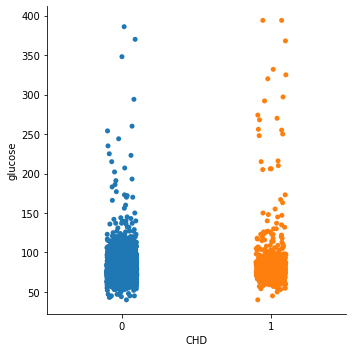

In [70]:
data = df[["glucose", "CHD"]]
seaborn.catplot(x="CHD", y="glucose", data = data)

> When looking at some of the obvious risk factors like BMI and cigarette usage, graphing has made it clear that not just one item is a driver for chronic heart disease. It is a culmination of many things. As such we will not drop any colums before training our models. 

## Data imputation and reprinting after imputation

In [37]:
df['BMI'].interpolate(method='linear', inplace=True, limit_direction="both")
df.isnull().sum()
for x in range(0,len(mylist)):
    print(df.loc[[mylist[x]]])

    age  cigsPerDay  totChol  sysBP  diaBP    BMI  heartRate  glucose  CHD
91   40           0      205  100.0   60.0  25.18         60       72    1
      age  cigsPerDay  totChol  sysBP  diaBP     BMI  heartRate  glucose  CHD
1048   64           3      221  148.0   85.0  23.605         90       80    1
      age  cigsPerDay  totChol  sysBP  diaBP    BMI  heartRate  glucose  CHD
1446   40           0      164  135.0   75.0  22.75         75       85    0
      age  cigsPerDay  totChol  sysBP  diaBP    BMI  heartRate  glucose  CHD
1456   40          20      266  101.0   73.0  22.63         70       64    0
      age  cigsPerDay  totChol  sysBP  diaBP     BMI  heartRate  glucose  CHD
1474   70           0      107  143.0   93.0  24.255         68       62    1
      age  cigsPerDay  totChol  sysBP  diaBP     BMI  heartRate  glucose  CHD
1783   63          20      213  163.0   94.0  26.685         76       69    1
      age  cigsPerDay  totChol  sysBP  diaBP    BMI  heartRate  glucose  C

# Training and analysis

## Split test and training

In [40]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 8].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

array([[ 49.  ,  20.  , 273.  , ...,  23.19,  95.  ,  72.  ],
       [ 62.  ,   0.  , 332.  , ...,  28.5 ,  68.  ,  92.  ],
       [ 41.  ,   5.  , 192.  , ...,  19.16,  62.  ,  90.  ],
       ...,
       [ 54.  ,   0.  , 195.  , ...,  26.21,  75.  , 100.  ],
       [ 42.  ,  20.  , 225.  , ...,  23.43,  95.  ,  85.  ],
       [ 59.  ,   3.  , 216.  , ...,  25.86,  66.  ,  84.  ]])

## Normalizing of data

In [52]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


[[574  72]
 [ 91  26]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.88       646
           1       0.27      0.22      0.24       117

    accuracy                           0.79       763
   macro avg       0.56      0.56      0.56       763
weighted avg       0.77      0.79      0.78       763

0.21363040629095675


## First value for K, confusion matrix, and error rate

In [55]:
classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

pred_i = classifier.predict(X_test)
print(np.mean(pred_i != y_test))

[[574  72]
 [ 91  26]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.88       646
           1       0.27      0.22      0.24       117

    accuracy                           0.79       763
   macro avg       0.56      0.56      0.56       763
weighted avg       0.77      0.79      0.78       763

0.21363040629095675


## Second value for K, confusion matrix, and error rate

In [53]:
classifier = KNeighborsClassifier(n_neighbors=2)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

pred_i = classifier.predict(X_test)
print(np.mean(pred_i != y_test))

[[635  11]
 [108   9]]
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       646
           1       0.45      0.08      0.13       117

    accuracy                           0.84       763
   macro avg       0.65      0.53      0.52       763
weighted avg       0.79      0.84      0.79       763

0.1559633027522936


## Third value for K, confusion matrix, and error rate

In [54]:
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

pred_i = classifier.predict(X_test)
print(np.mean(pred_i != y_test))

[[613  33]
 [ 99  18]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       646
           1       0.35      0.15      0.21       117

    accuracy                           0.83       763
   macro avg       0.61      0.55      0.56       763
weighted avg       0.78      0.83      0.80       763

0.17300131061598953


## Basic evaluation
> Using a k value of two resulted in the highest error rate. With this model we were able to accuratley predict chronic heart disease nearly 85% of the time. With a k value of one that drops to about 79%. With a k value of 3 which is a close second but still comes in at only 83%

> This makes it clear that the model with a k value of 2 is the one that should be shown to our client. 

# References and Sources
https://stackoverflow.com/questions/52933862/sklearn-or-pandas-impute-missing-values-with-simple-linear-regression <br>
https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn<br>
https://www.geeksforgeeks.org/python-seaborn-pairplot-method/<br>
https://towardsdatascience.com/data-science-titanic-challenge-solution-dd9437683dcf<br>
https://tryolabs.com/blog/2017/03/16/pandas-seaborn-a-guide-to-handle-visualize-data-elegantly/